# カイ二乗分布

In [2]:
from shiori.utils.viewer import set_plot_params, sns, plt
from shiori.utils.path import ProjectPath
from pathlib import Path
import numpy as np
from matplotlib import animation
from math import gamma
from scipy.stats import chi2
set_plot_params()
name = Path().cwd().name + "/chi2"
proj = ProjectPath(save_dst=name)
save_dir = proj.save_dir
save_dir.mkdir(parents=True, exist_ok=True)
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})


In [3]:
ks = [1, 2, 4, 6]

In [4]:
x = np.linspace(0, 30, 1000)

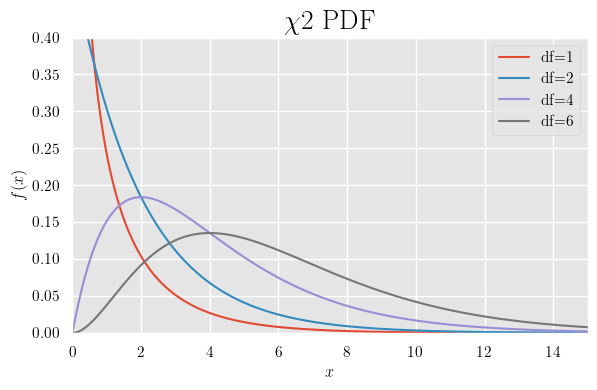

In [10]:
# --- PDF ---
plt.figure(figsize=(6,4))
for k in ks:
    plt.plot(x, chi2.pdf(x, df=k), label=f"df={k}")
plt.title(rf"$\chi2$ PDF", fontsize=20)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.ylim(0, 0.4)
plt.xlim(0, 15)
plt.savefig(save_dir.joinpath("chi2.png"), dpi=300, facecolor="white")
plt.show()


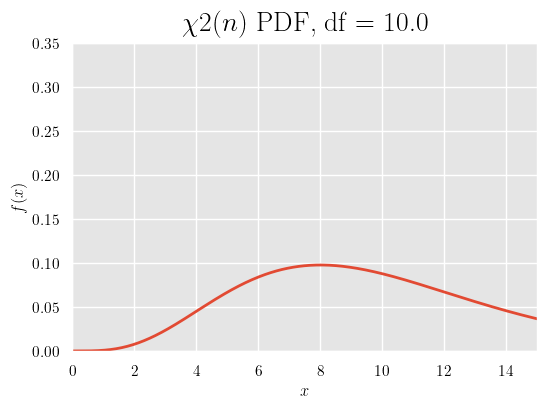

In [7]:
def chi2_pdf(x, k):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    m = x > 0
    c = 1.0 / (2.0**(k/2) * gamma(k/2))
    out[m] = c * x[m]**(k/2 - 1) * np.exp(-x[m]/2)
    return out

# params
dfs = np.linspace(1,10,20)
x = np.linspace(0, 30, 1000)

fig, ax = plt.subplots(figsize=(6, 4))
(line,) = ax.plot([], [], lw=2)
title = ax.text(0.5, 1.02, "", ha="center", va="bottom", transform=ax.transAxes)
ax.set_xlim(0, 15)
ax.set_ylim(0, 0.35)
ax.set_xlabel("$x$"); ax.set_ylabel("$f(x)$"); ax.grid(True)

def init():
    line.set_data([], [])
    title.set_text("")
    return line, title

def update(i):
    k = list(dfs)[i]
    y = chi2_pdf(x, k)
    line.set_data(x, y)
    title.set_text(rf"$\chi2(n)$ PDF, df = {round(k, 3)}")
    title.set_fontsize(20)
    return line, title

ani = animation.FuncAnimation(fig, update, frames=len(list(dfs)),
                              init_func=init, blit=True, interval=1000/12)

from matplotlib.animation import PillowWriter
ani.save(save_dir / "chi2.gif", writer=PillowWriter(fps=2))
